<a href="https://colab.research.google.com/github/rumijay/Data-Science-2025/blob/main/Rumi_Jawad_Unit4Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- All students are allowed to use this data set: [NBA player data from the 2023-2024 season](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). Why? This is could lead to similar analysis as the soccer data analysis--basically, I think this data set will work well with the models we ran in class. Let me know if you have questions about downloading and cleaning the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit4NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.


# Unit 4 Project: Using Hierarchies to Account for Dependence Between Groups

**Task**:

Two parts:

1. Propose a data set that's compatible with a hierarchical model structure built with pymc, and that potentially has some dependence between subgroups within the data set. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one piror and at least one hyperprior.
- Your model must have at least one seperate prior for each subgroup of the data set, and a at least one shared hyperior for all the groups.
- Any student may use the following data set: [basketball2324](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). I recommend trying to model TRB (total rebounds) by player position (pos). Also, I recommend pandas query function to splice and clean the data.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import graphviz as gv
import pymc as pm



Context: I chose this dataset because it was provided to me, and I do not want go through the hardships of finding my own dataset, because last time my dataset cooked me.

In [2]:
#load the data from my github page.
#cs stands for chemical shift data
url_cs = 'https://github.com/rumijay/Data-Science-2025/raw/main/Rumi%20data.xlsx'
#I could have put the url string directly into pd.read_csv()
cs_data = pd.read_excel(url_cs)

I removed everything but Pos and TRB.

In [3]:
cs_data


,Player,Pos,TRB
0,Ja Morant,PG,50
1,Marcus Morris,PF,134
2,Markieff Morris,PF,39
3,Monte Morris,PG,57
4,Trey Murphy III,SF,280
...,...,...,...
210,Thaddeus Young,PF,103
211,Trae Young,PG,149
212,Omer Yurtseven,C,208
213,Cody Zeller,C,112


<Axes: ylabel='TRB'>

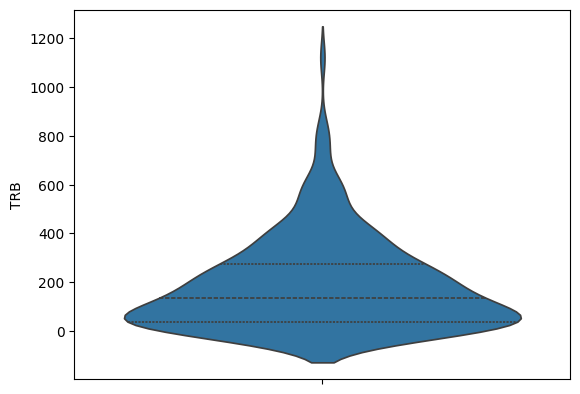

In [17]:
sns.violinplot(cs_data.TRB,inner='quart')


this plot showed all the rebounds  as to player position.

Based on the right skew, an exponential or gamma prior would be best for this data.

In [7]:
#this is an array of the soccer positions,
#except they are given an int (number) label instead of a string (of letters)
pos_idx = cs_data.Pos.astype('category').cat.codes.values

#an array of the four strings that represent position
pos_codes = cs_data.Pos.astype('category').cat.categories

#puts coords in a dict, so pymc can read them
sccr_coords = {"pos": pos_codes}

In [ ]:
with pm.Model(coords = sccr_coords) as sccr_model:
    # Hyperprior
    #
    a = pm.Gamma('μ', alpha = 0.5, beta = 1)
    b = pm.Gamma('ν', alpha = 0.5, beta = 1)

    #prior
    λ = pm.Exponential('λ', lam = a)


    #This tells our model how many shots and goals each player has
    _ = pm.Exponential('trb', lam = λ, observed = cs_data.TRB.values)

    #target_accept has a default of 0.8. Increasing it makes us less likely to
    #have divergences
    idata_sccr = pm.sample(target_accept = 0.95)

Both the hyperpriors are using a Gamma ditribution (alpha = 0.5) and (beta = 1)  
Then used an exponential prior

In [ ]:
pm.sample_posterior_predictive(idata_sccr, model=sccr_model, extend_inferencedata=True)


(0.0, 1100.0)

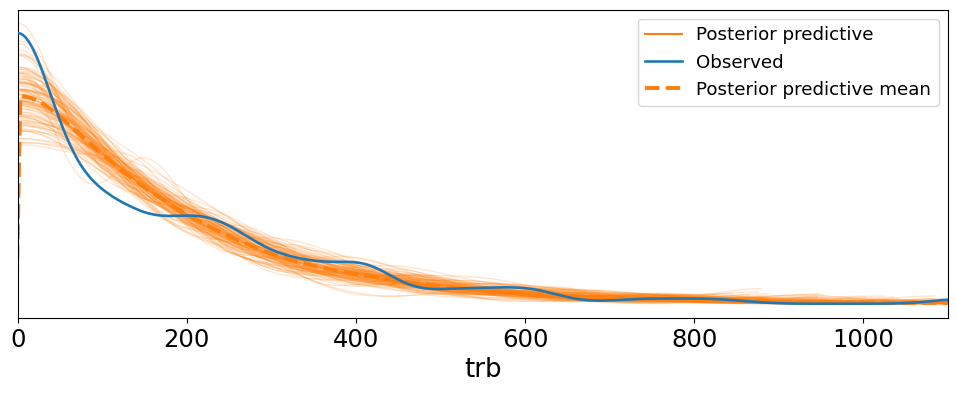

In [10]:
ax = az.plot_ppc(idata_sccr, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(0, 1100)

After seeing the representations, I think both were good.

In [ ]:
with pm.Model(coords = sccr_coords) as sccr_model:

    #prior
    λ = pm.Exponential('λ', lam = 15)


    #This tells our model how many shots and goals each player has
    _ = pm.Exponential('trb', lam = λ, observed = cs_data.TRB.values)

    #target_accept has a default of 0.8. Increasing it makes us less likely to
    #have divergences
    idata_sccr = pm.sample(target_accept = 0.95)

In [ ]:
pm.sample_posterior_predictive(idata_sccr, model=sccr_model, extend_inferencedata=True)


The model below is the NonHierachial model (Not with Gammar hyperprior).

Both models look almost the same.

(0.0, 1100.0)

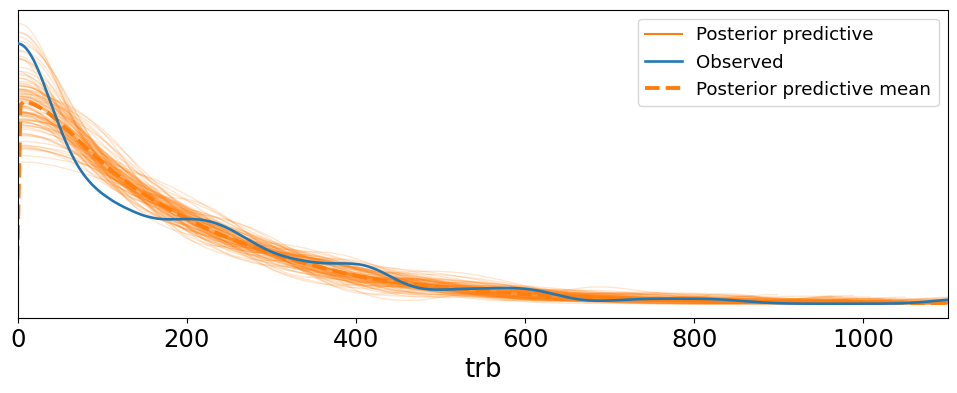

In [13]:
ax = az.plot_ppc(idata_sccr, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(0, 1100)

array([[<Axes: title={'center': 'λ'}>, <Axes: title={'center': 'λ'}>]],
      dtype=object)

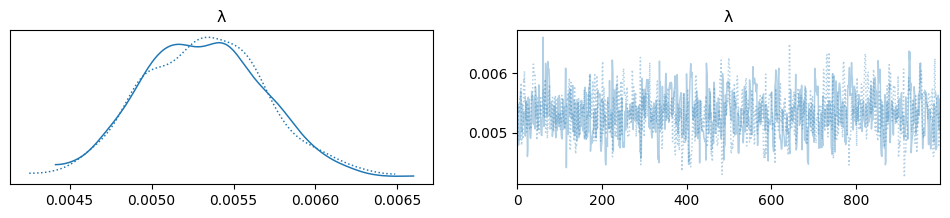

In [14]:
az.plot_trace(idata_sccr)

array([<Axes: >], dtype=object)

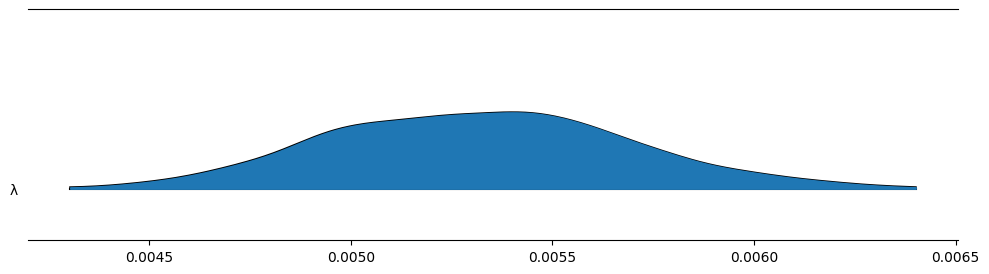

In [16]:
az.plot_forest(idata_sccr, var_names=['λ'], combined=True, figsize=(12, 3), kind = 'ridgeplot', hdi_prob=0.998)


Conclusion: After examining the violin plot and anticipating a right skew, I chose priors that likely improved the accuracy of the posterior predictive model. As a result, the hierarchical and nonhierarchical models appeared visually similar and showed good alignment with the priors, hyperpriors, and posterior predictive means.

I also believe being provided a dataset was very helpful.